# Space-x project 
Space-x is a learning project in data science.It includes different parts which data scientists usually encounter in real projects such as data gathering, data preparation, feature engineering, machine learning models and visualization. In addition, the different parts of python syntax and working with various libraries are exhibited.

## Space-x project objective
We want to predict whether or not a rocket launched before is able to land successfully? If it could land successfully, it would be able to reuse. We use machine learning techniques to answer this question.

## Section 1 import required libreries and objects


<details>
  <summary>In this project,these libraries are applied (click here)</summary>
    
    1. Pandas
    2. matplotlib
    3. Seaborn
    4. Sklearn
    
 </details>

<div class="alert alert-block alert-info">
<b>Note:</b> This section was completed while the project progress. 
</div>

In [64]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pickle
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)



## Section 2 gaining insight into dataset

### Reading the dataset with Pandas and explore it 

<div class="alert alert-block alert-info">
<b>Note:</b> As it can be seen target column is the 'class' showing successful or unsuccessful landing of a rocket. 
</div>

In [4]:
df=pd.read_csv('dataset_falcon9.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [5]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [6]:
print(df.shape)
df[5:10]

(90, 18)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
5,6,2014-01-06,Falcon 9,3325.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.0,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.0,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1
8,9,2014-08-05,Falcon 9,4535.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857,0
9,10,2014-09-07,Falcon 9,4428.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857,0


### Explore the dataframe in another way to find out distinect valuse in each columns.
In this way, we will find out some columns such as BoosterVersion with one value does not have any impact on our results, so it coulde be removed from dataframe. Futhermore, Some columns such as filght number or date do not contain valuable information for our purpose, so they can be removed as well

In [7]:
for cols in df.columns:
    print('distinct values of The column {} are {}:'.format(cols,len(set(df[""+cols+""]))),'\nthe values are\n\n',set(df[""+cols+""]),'\n')

distinct values of The column FlightNumber are 90: 
the values are

 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90} 

distinct values of The column Date are 90: 
the values are

 {'2015-02-11', '2017-09-07', '2020-03-07', '2019-11-11', '2020-09-03', '2020-08-30', '2017-12-15', '2018-12-03', '2018-03-06', '2015-12-22', '2018-08-07', '2018-07-25', '2015-01-10', '2017-06-03', '2015-04-14', '2018-06-04', '2020-11-05', '2019-12-17', '2020-07-20', '2018-06-29', '2020-04-22', '2020-05-30', '2017-03-30', '2016-08-14', '2018-09-10', '2017-05-01', '2016-07-18', '2018-07-22', '2018-10-08', '2020-10-24', '2019-01-11', '2018-12-23', '2016-05-27', '2020-01-19', '2017-08-24', '2020-03-18', '2016-04-08

<div class="alert alert-block alert-info">
<b>Tip:</b> Finding missing values with isnull().sum() method  
</div>

In [8]:
for cols in df.columns:
    if df[""+cols+""].count()<len(df.index):
       print("The column {} has {} missing values\n".format(cols,df[""+cols+""].isnull().sum()))


The column LandingPad has 26 missing values



### Describe method shows some statistical indicators of numerical columns such as minimum, maximum, average and standard deviation
It clearly reveals that numbers of our dataframe have different order and it should be standardized later

In [9]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


### Drawing Histogram plot for numeric columns to show the distribution of them, and how much they contribute to successful or unsuccessful landing
 In following cell, plots are drawn by histplot method from seaborn library,and a 'for' loop along with subplot method help us to draw all plots with one code.

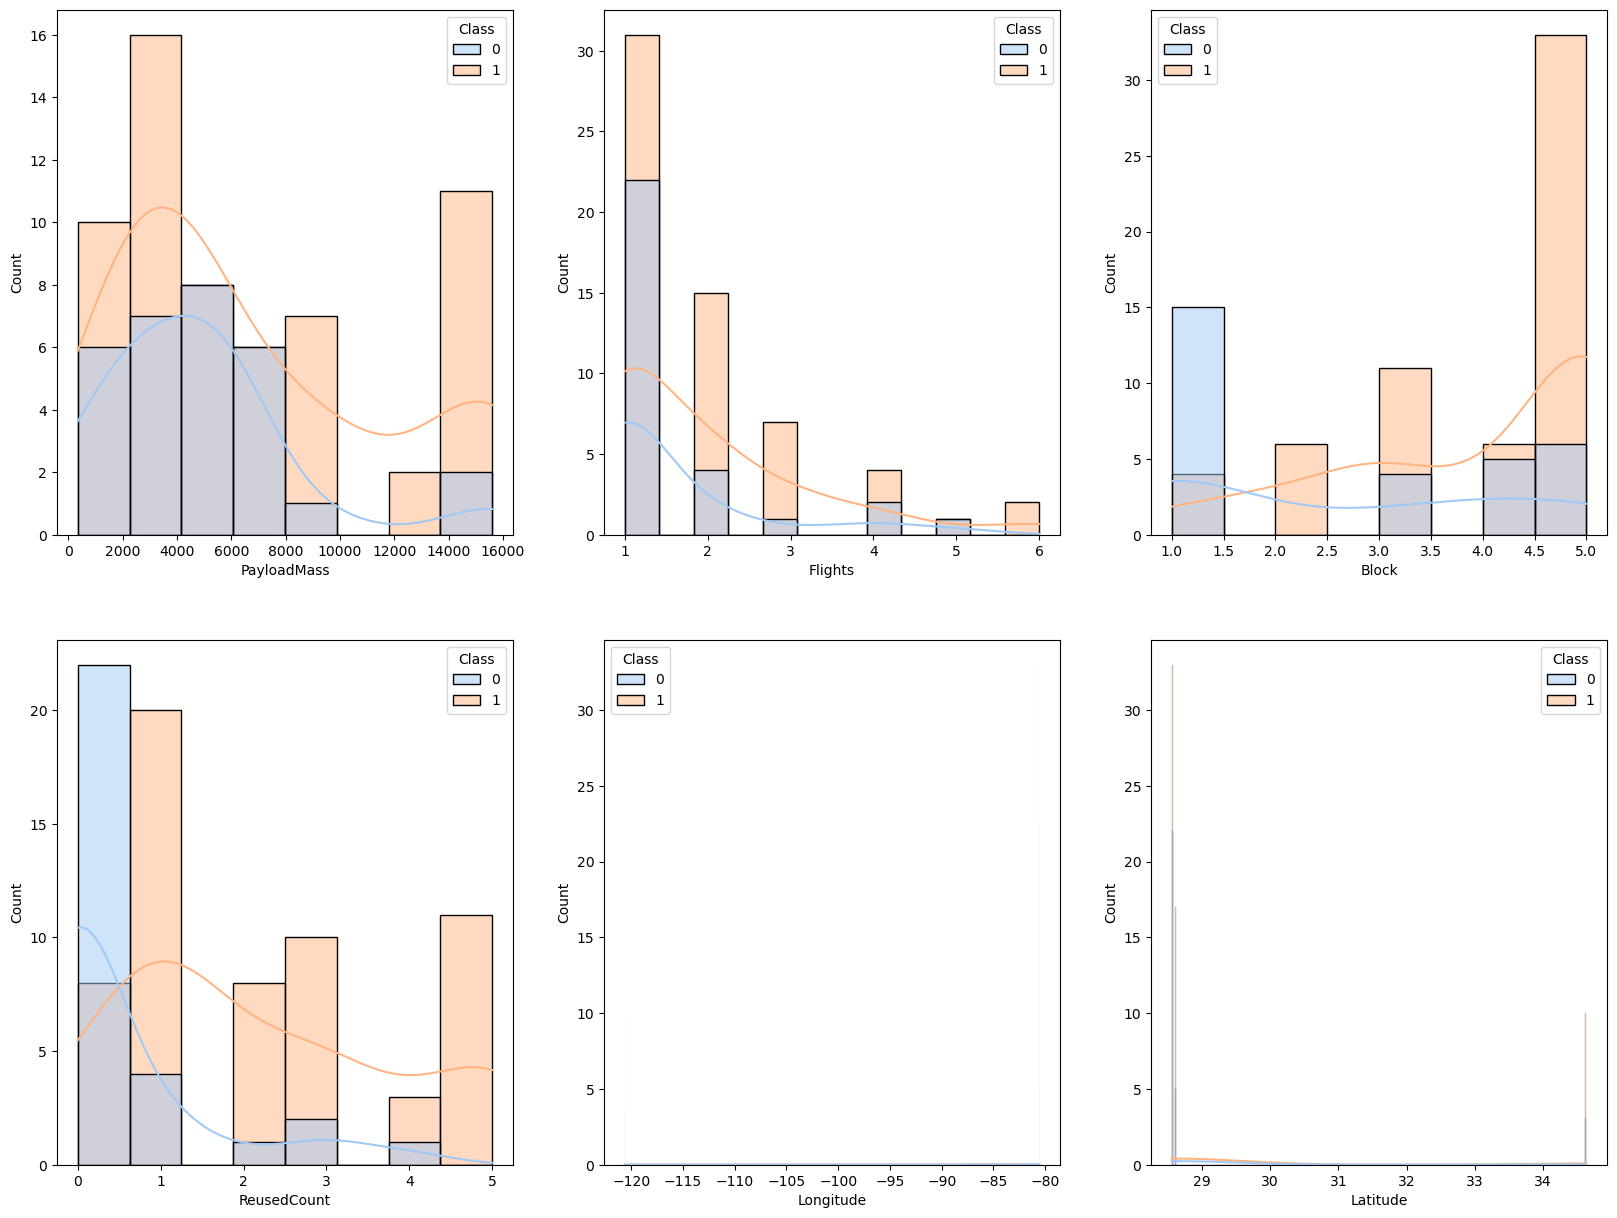

In [10]:
cols_name=['PayloadMass' , 'Flights', 'Block', 'ReusedCount', 'Longitude', 'Latitude']
plt.figure(figsize=(20,15),dpi=100)
index=1
for i in cols_name:
    plt.subplot(2,3,index)
    sn.histplot(x=i,data=df,palette="pastel",hue='Class',kde=True)
    index+=1

**select_dtypes** method is used to select the non-numeric columns. These columns will be used to draw barpot in following cell

In [11]:
df.select_dtypes(exclude='number').columns

Index(['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'GridFins',
       'Reused', 'Legs', 'LandingPad', 'Serial'],
      dtype='object')

### Drawing bar plot for categorical columns to show the count of them, and how much they contribute to successful or unsuccessful landing

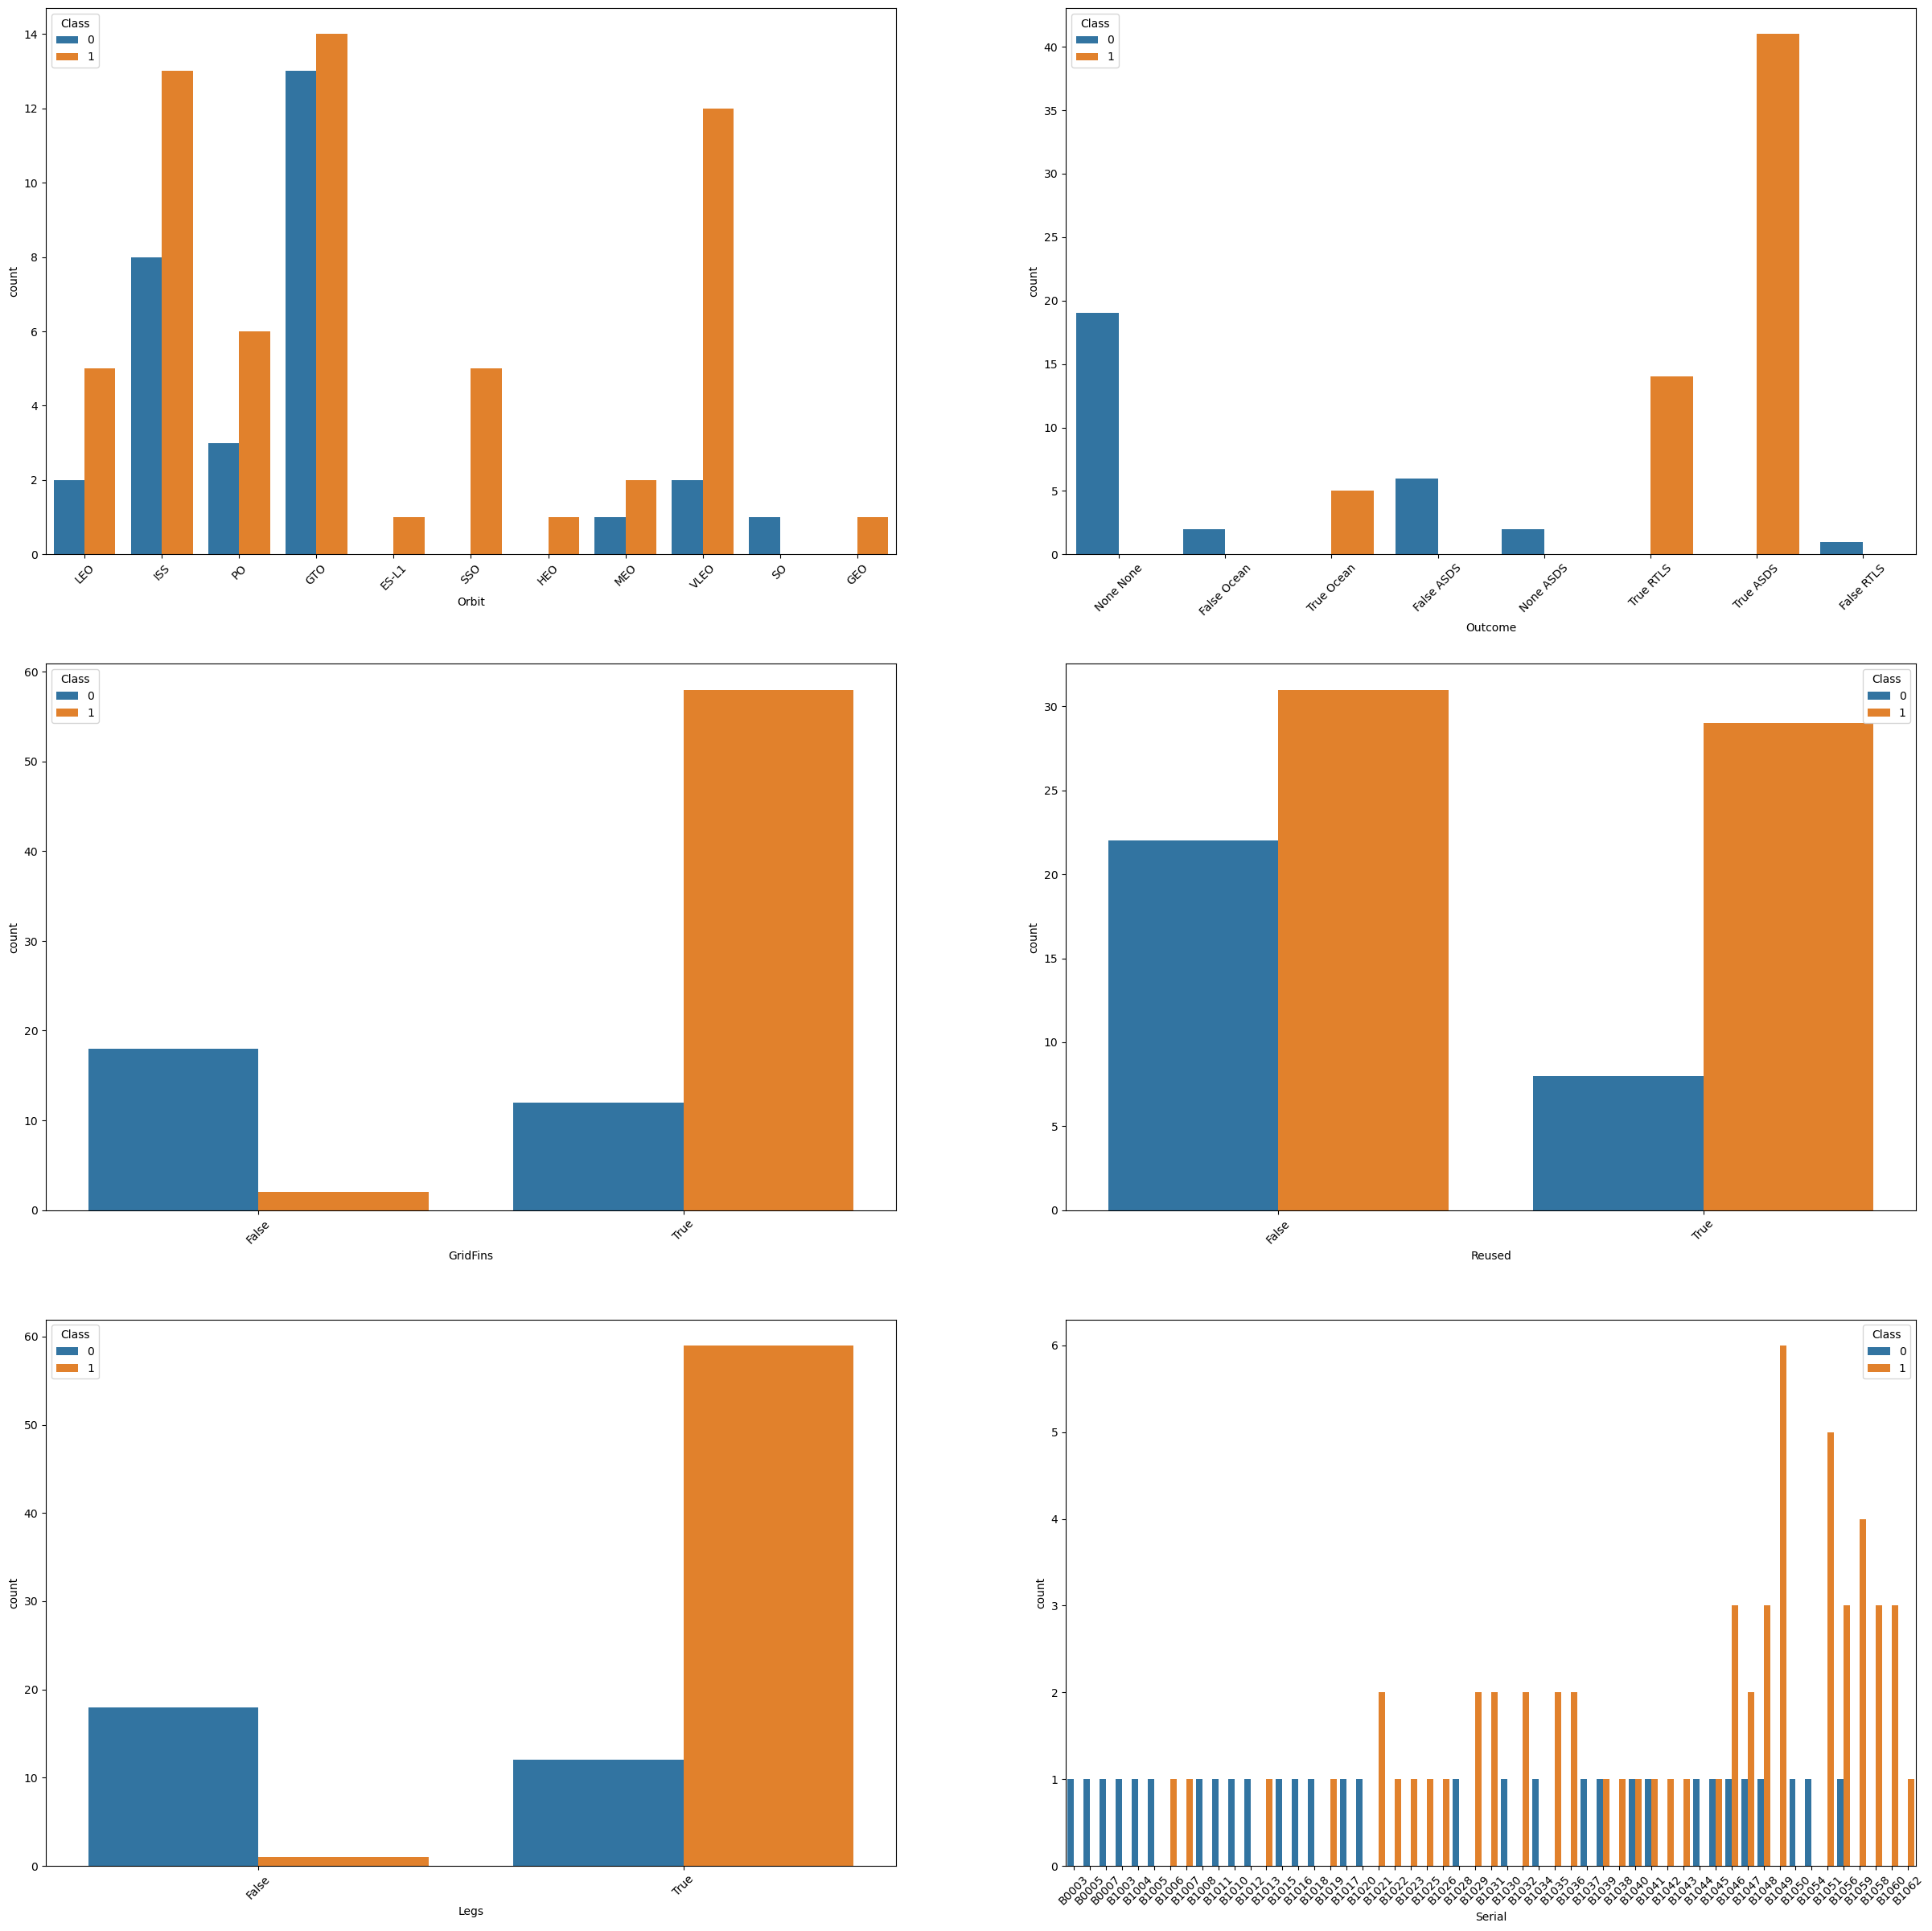

In [12]:
cols=['Orbit', 'Outcome', 'GridFins','Reused', 'Legs', 'Serial']
plt.figure(figsize=(30,30),dpi=100)
j=1
for i in cols:
    plt.subplot(3,2,j)
    sn.countplot(data=df,x=i,hue="Class")
    plt.xticks(rotation=45)
    j+=1

## Section 3 data preparation

### Removing useless columns according to results of exploring data
For instance, 'reused' column has an overlap with the 'Flights' column since 'Flights' shows how many times a rocket is used and 'reused' column shows whether or not the rocket was used before.


To find out more see dataset description

In [13]:
df2=df.drop(['FlightNumber','Date','BoosterVersion','LaunchSite','Reused','LandingPad','Serial'], axis=1)
df2.info()            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   Outcome      90 non-null     object 
 3   Flights      90 non-null     int64  
 4   GridFins     90 non-null     bool   
 5   Legs         90 non-null     bool   
 6   Block        90 non-null     float64
 7   ReusedCount  90 non-null     int64  
 8   Longitude    90 non-null     float64
 9   Latitude     90 non-null     float64
 10  Class        90 non-null     int64  
dtypes: bool(2), float64(4), int64(3), object(2)
memory usage: 6.6+ KB


* Exploring modified dataframe

In [14]:
df2.isnull().sum()

PayloadMass    0
Orbit          0
Outcome        0
Flights        0
GridFins       0
Legs           0
Block          0
ReusedCount    0
Longitude      0
Latitude       0
Class          0
dtype: int64

#### preparing 'Outcome' column
*  As it is mentioned in the dataset document, 'Outcome consists of two parts.The first Part shows status of landing, and second part shows the type of landing place including ocean,landed to ground pad and so on. It means that the first part has an overlap with the target column, so it could lead to leaking data.


* With split method, the column is divided into two parts and then the par one is removed, and part 2 added to dataframe


In [15]:
outcome_new=df2['Outcome'].str.split(n=2,expand=True)
outcome_new.drop(0,axis=1,inplace=True)
outcome_new.columns=['new_outcome']
outcome_new

,new_outcome
0,None
1,None
2,None
3,Ocean
4,None
...,...
85,ASDS
86,ASDS
87,ASDS
88,ASDS


In [16]:
df3=df2.drop('Outcome',axis=1)
df4=pd.concat([df3,outcome_new],axis=1)
df4.columns

Index(['PayloadMass', 'Orbit', 'Flights', 'GridFins', 'Legs', 'Block',
       'ReusedCount', 'Longitude', 'Latitude', 'Class', 'new_outcome'],
      dtype='object')

### Convert the non-numeric columns to numeric columns
* As only numeric variables are valid for all machine learning methods, non-numeric columns must be converted to numeric. There are plenty of ways to associate a number to a categorical variable. In this notebook, dummy method is used for this purpose.
* **The Dummy method** can be considered as a pivot table which is set to one or zero in intersecting cells according to where the categorical variable is used.


In [17]:
dummies=df4.select_dtypes(exclude=['number','bool']).columns
dummies

Index(['Orbit', 'new_outcome'], dtype='object')

In [18]:
df_dummies=pd.get_dummies(df4[dummies])
df_dummies

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,new_outcome_ASDS,new_outcome_None,new_outcome_Ocean,new_outcome_RTLS
0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
86,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
87,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
88,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0


* Another type of date that must be converted is **boolean**. **Astype method** is used to cast the boolean variable to integer

In [19]:
cols_bool=df4.select_dtypes(include=['bool']).columns
for w in cols_bool:
    df4[w]=df4[w].astype(int)
    print('Type of column {} become {}'.format(w,df4[w].dtype))
    

Type of column GridFins become int32
Type of column Legs become int32


* Dropping non-numeric columns and creating a the numeric data frame which is appropriate for machine learning method

In [20]:
df5=df4.drop(dummies,axis=1)
df6=pd.concat([df5,df_dummies],axis=1)
df6

,PayloadMass,Flights,GridFins,Legs,Block,ReusedCount,Longitude,Latitude,Class,Orbit_ES-L1,...,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,new_outcome_ASDS,new_outcome_None,new_outcome_Ocean,new_outcome_RTLS
0,6104.959412,1,0,0,1.0,0,-80.577366,28.561857,0,0,...,1,0,0,0,0,0,0,1,0,0
1,525.000000,1,0,0,1.0,0,-80.577366,28.561857,0,0,...,1,0,0,0,0,0,0,1,0,0
2,677.000000,1,0,0,1.0,0,-80.577366,28.561857,0,0,...,0,0,0,0,0,0,0,1,0,0
3,500.000000,1,0,0,1.0,0,-120.610829,34.632093,0,0,...,0,0,1,0,0,0,0,0,1,0
4,3170.000000,1,0,0,1.0,0,-80.577366,28.561857,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,1,1,5.0,2,-80.603956,28.608058,1,0,...,0,0,0,0,0,1,1,0,0,0
86,15400.000000,3,1,1,5.0,2,-80.603956,28.608058,1,0,...,0,0,0,0,0,1,1,0,0,0
87,15400.000000,6,1,1,5.0,5,-80.603956,28.608058,1,0,...,0,0,0,0,0,1,1,0,0,0
88,15400.000000,3,1,1,5.0,2,-80.577366,28.561857,1,0,...,0,0,0,0,0,1,1,0,0,0


### The last step of data preparation is Standardized the values
* As it was mentioned before,the order of variables is not the same, and it results in error in machine prediction. As a consequence, preprocessing.StandardScaler method from scikit learn library is used to standardize the independent variables.
* It means that all variables after this process have zero average and standard deviation one.

In [21]:
x=df6.drop('Class',axis=1)
y=df6['Class']
transform=preprocessing.StandardScaler()
x_scale=transform.fit_transform(x)
cols=x.columns
x_final=pd.DataFrame(x_scale,columns=cols)
df_final=pd.concat([x_final,y],axis=1)
df_final.describe()

,PayloadMass,Flights,GridFins,Legs,Block,ReusedCount,Longitude,Latitude,Orbit_ES-L1,Orbit_GEO,...,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,new_outcome_ASDS,new_outcome_None,new_outcome_Ocean,new_outcome_RTLS,Class
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,...,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,90.000000
mean,-5.304399e-17,-4.231183e-16,1.504969e-16,4.564250e-16,1.332268e-16,6.167906e-17,7.549517e-16,-7.117763e-16,-5.612794e-17,-1.696174e-17,...,1.578984e-16,2.343804e-17,-2.683039e-17,1.541976e-17,3.682240e-16,1.554312e-16,-2.590520e-16,-1.665335e-16,-4.564250e-17,0.666667
std,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,...,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,1.005602e+00,0.474045
min,-1.232717e+00,-6.539128e-01,-1.870829e+00,-1.933091e+00,-1.575895e+00,-9.734405e-01,-2.433736e+00,-4.170730e-01,-1.059998e-01,-1.059998e-01,...,-1.856953e-01,-3.333333e-01,-1.059998e-01,-2.425356e-01,-4.291975e-01,-1.093216e+00,-5.173061e-01,-2.904089e-01,-4.472136e-01,0.000000
25%,-7.698824e-01,-6.539128e-01,5.345225e-01,5.173061e-01,-9.455367e-01,-9.734405e-01,4.095408e-01,-4.170730e-01,-1.059998e-01,-1.059998e-01,...,-1.856953e-01,-3.333333e-01,-1.059998e-01,-2.425356e-01,-4.291975e-01,-1.093216e+00,-5.173061e-01,-2.904089e-01,-4.472136e-01,0.000000
50%,-3.006221e-01,-6.539128e-01,5.345225e-01,5.173061e-01,3.151789e-01,-3.854563e-01,4.114305e-01,-4.170730e-01,-1.059998e-01,-1.059998e-01,...,-1.856953e-01,-3.333333e-01,-1.059998e-01,-2.425356e-01,-4.291975e-01,9.147320e-01,-5.173061e-01,-2.904089e-01,-4.472136e-01,1.000000
75%,6.014309e-01,1.749908e-01,5.345225e-01,5.173061e-01,9.455367e-01,7.905120e-01,4.114305e-01,-3.953759e-01,-1.059998e-01,-1.059998e-01,...,-1.856953e-01,-3.333333e-01,-1.059998e-01,-2.425356e-01,-4.291975e-01,9.147320e-01,-5.173061e-01,-2.904089e-01,-4.472136e-01,1.000000
max,2.033845e+00,3.490605e+00,5.345225e-01,5.173061e-01,9.455367e-01,1.966480e+00,4.114305e-01,2.433637e+00,9.433981e+00,9.433981e+00,...,5.385165e+00,3.000000e+00,9.433981e+00,4.123106e+00,2.329929e+00,9.147320e-01,1.933091e+00,3.443420e+00,2.236068e+00,1.000000


* Our dataframe is prepared and we can save it by **to_csv** method from **Pandas** library

In [22]:
df_final.to_csv('SpaceX final dataframe.csv')

## Stage 4 Preparing and using machine learning methods

 * This function is used to show the confusion matrix  values of different machine learning methods in a heatmap plot from seaborn library

In [23]:
def plot_confusion_matrix (y,y_predicted,model_name):
    cm=confusion_matrix(y,y_predicted)
    sn.heatmap(data=cm,annot=True,xticklabels=['Did not land','Land'],yticklabels=['Did not land','Land'])
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual Lablels')
    plt.title('Confusion Matrix for {} model'.format(model_name))

* Defining independent variable and dependent variables and also splitting the data to test and train is a common step for all machine learnnig methods.
* train_test_split method from scikit learn library, family model_selection is used to split the data

In [24]:
x=df_final.drop('Class',axis=1)
y=df_final['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

<details>
    <summary> The following cell includes these steps (click here) </summary>
    
    1. Instantiating of four machine learning models including:
        1.1 Logistic Regression
        1.2 Support Vector Machine
        1.3 Decision Tree Classification
        1.4 K Nearest Neighbors
    2. Defining a list of models
    3. setting the hyper-parameters for each model
    4. summarize all parameters in one dictionary called 'param'
    5. Defining a dictionary for names of models and two empty variable to gather result of machine learning

</details>

In [33]:
lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()


List_Model=[lr,svm,dt,knn]

lr_param={'C':[0.01,0.1,1],'solver':['lbfgs'],'penalty':['l2']}
svm_param={'C':[0.5,1,1.5],'kernel':['linear','rbf','poly','sigmoid']}
dt_param={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[2*n for n in range(1,10)],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_features':['auto','sqrt']}
knn_param={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}

param={lr:lr_param,svm:svm_param,dt:dt_param,knn:knn_param}

list_modle_name={lr:'Logistic Regression',svm:'Support Vector Machine',dt:'Decision Tree Classifier',knn:'K Nearest Neighbor' }
acc_success={}
acc_fail={}
best_param={}

**In the following cell , four machine learning objects will be trained and tested with a 'for' loop, and results of their confusion matrix will be shown by a previously defined function in heatmap plots in one frame.**

<div class="alert alert-block alert-danger">
<b>Note:</b>As it can be seen, the Logistic Regression model shows the best result overally. It should be considered that although Support Vector Machine model and K Nearest Neighbors model show perfect results for state of successful landing,it is in expense of losing accuracy for the state of unsuccessful landing 
</div>


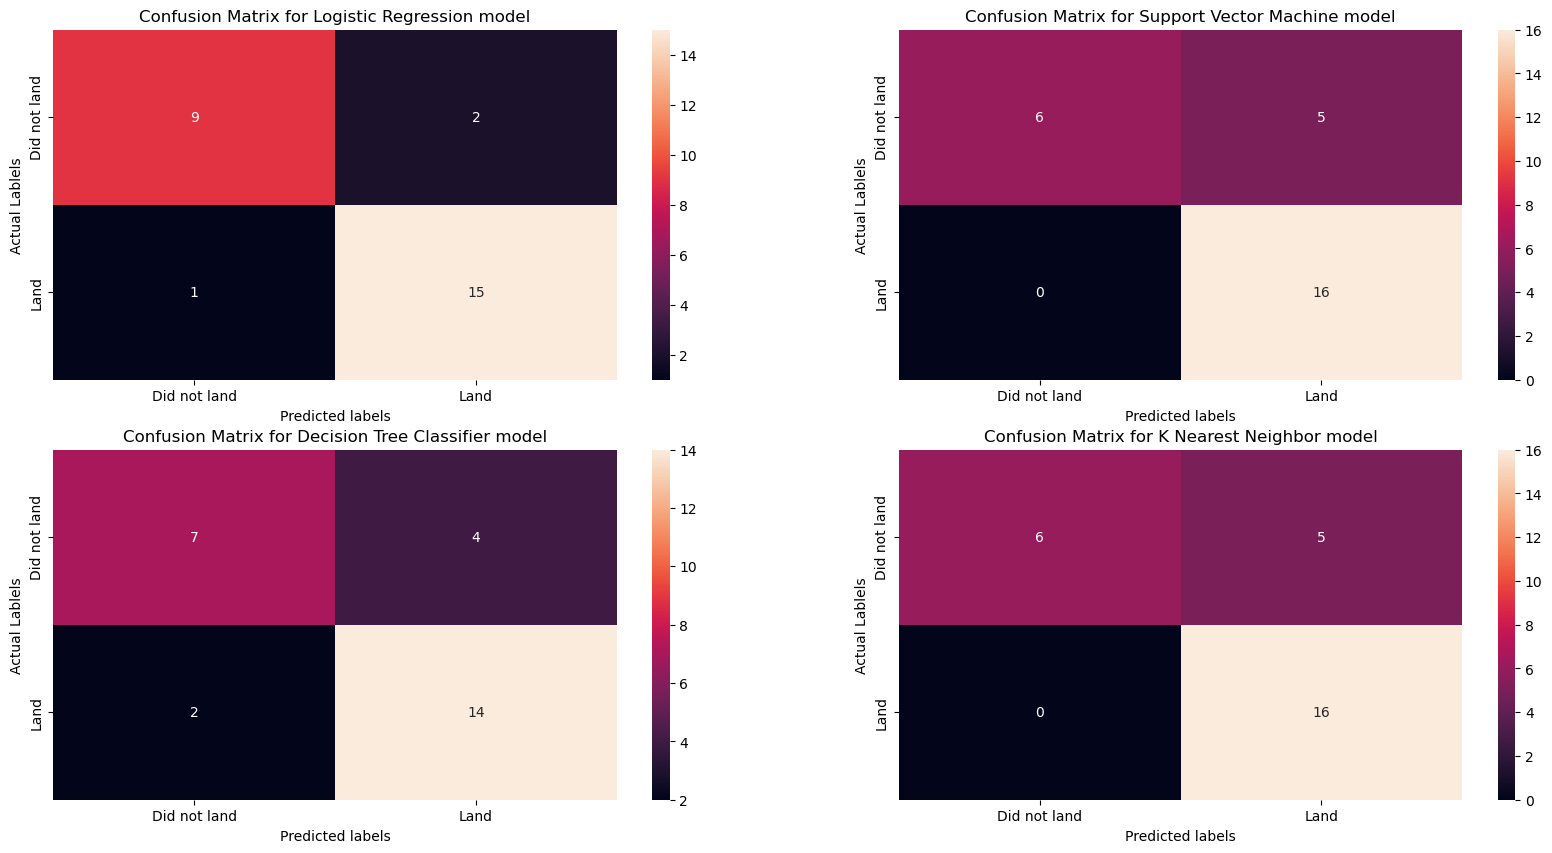

In [34]:
plt.figure(figsize=(20,10),dpi=100)

index=1
for m in List_Model:
    Model_cv=GridSearchCV(m,param[m],cv=4)
    Model_cv.fit(x_train,y_train)
    y_predict=Model_cv.predict(x_test)
    cr=classification_report(y_test,y_predict ,output_dict=True)
    cr['1'].update({'accuracy':cr['accuracy']})
    cr['0'].update({'accuracy':cr['accuracy']})
    acc_success[list_modle_name[m]]=cr['1']
    acc_fail[list_modle_name[m]]=cr['0']
    plt.subplot(2,2,index)
    plot_confusion_matrix(y_test,y_predict,list_modle_name[m])
    best_param[list_modle_name[m]]=Model_cv.best_params_
    index+=1
    

*In following table, __precision, recall, f1-score, accuracy factors__ are shown in compare with each other  for the state of __successful landing__*

In [27]:
df_acc_success=pd.DataFrame(acc_success)
df_acc_success=df_acc_success.drop('support',axis=0)
df_acc_success

,Logistic Regression,Support Vector Machine,Decision Tree Classifier,K Nearest Neighbor
precision,0.882353,0.761905,0.882353,0.761905
recall,0.937500,1.000000,0.937500,1.000000
f1-score,0.909091,0.864865,0.909091,0.864865
accuracy,0.888889,0.814815,0.888889,0.814815


The below bar chart shows the results previous table visually

<AxesSubplot:>

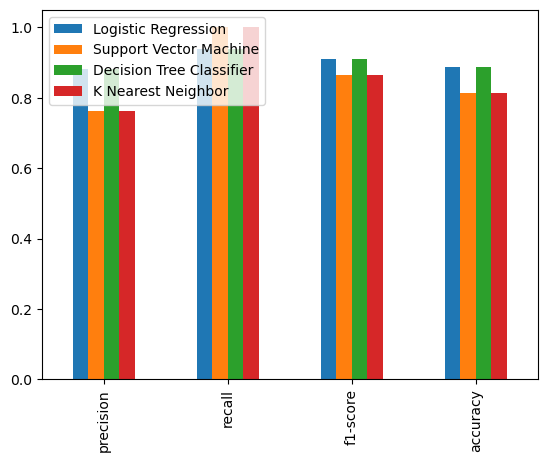

In [28]:
df_acc_success.plot.bar()

*In following table, __precision, recall, f1-score, accuracy factors__ are shown in compare with each other  for the state of __unsuccessful landing__*

In [29]:
df_acc_fail=pd.DataFrame(acc_fail)
df_acc_fail=df_acc_fail.drop('support',axis=0)
df_acc_fail

,Logistic Regression,Support Vector Machine,Decision Tree Classifier,K Nearest Neighbor
precision,0.900000,1.000000,0.900000,1.000000
recall,0.818182,0.545455,0.818182,0.545455
f1-score,0.857143,0.705882,0.857143,0.705882
accuracy,0.888889,0.814815,0.888889,0.814815


<AxesSubplot:>

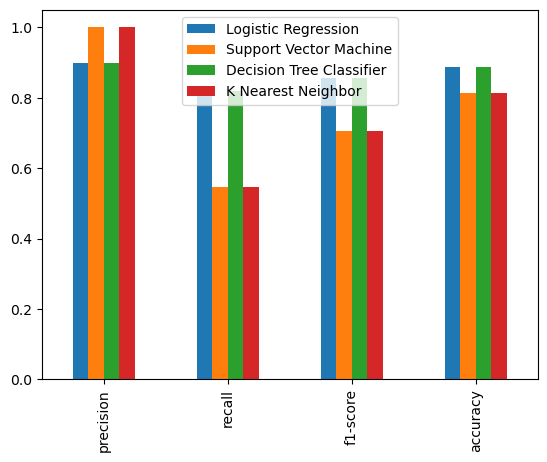

In [30]:
df_acc_fail.plot.bar()

### The following plot shows the ROC curve for all models

<div class="alert alert-block alert-info">
<b>Note:</b> As it is expected, only three curves can be seen, since results of the Support Vector Machine and K Nearest Neighbor are the same (please see results for successful landing), and their curves have coincided.
</div>



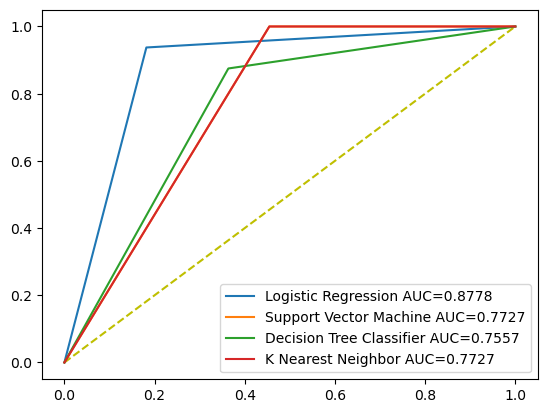

In [31]:
plt.plot([0,1],[0,1],'y--')
for m in List_Model:
    Model_cv=GridSearchCV(m,param[m],cv=4)
    Model_cv.fit(x_train,y_train)
    y_predict=Model_cv.predict(x_test)
    fpr, tpr, thresholds= roc_curve(y_test, y_predict)
    auc = round(roc_auc_score(y_test, y_predict), 4)
    plt.plot(fpr,tpr,label=list_modle_name[m]+' AUC='+str(auc))
    plt.legend()

*The below table shows the best **hyper-parameters** chosen for each machine learning model.*

In [36]:
df_best_param=pd.DataFrame(best_param)
df_best_param

,Logistic Regression,Support Vector Machine,Decision Tree Classifier,K Nearest Neighbor
C,1,0.5,NaN,NaN
penalty,l2,NaN,NaN,NaN
solver,lbfgs,NaN,NaN,NaN
kernel,NaN,sigmoid,NaN,NaN
criterion,NaN,NaN,gini,NaN
max_depth,NaN,NaN,8,NaN
max_features,NaN,NaN,sqrt,NaN
min_samples_leaf,NaN,NaN,4,NaN
min_samples_split,NaN,NaN,10,NaN
splitter,NaN,NaN,best,NaN


### Stage 5 exporting the best model according to results to deploy and use it later

In [63]:
lr_cv=LogisticRegression(C=1, penalty='l2', solver='lbfgs')
lr_cv.fit(x_train,y_train)

LogisticRegression(C=1)

*The spaceX model is saved by **pickle library** and __dump method__*

In [66]:
pickle.dump(lr_cv,open('SpaceX.pkl','wb'))